In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np



In [ ]:


train_datagen = ImageDataGenerator(
    rescale=1./255,            # Rescale pixel values to [0, 1]
    rotation_range=20,         # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,     # Randomly shift images horizontally by up to 20% of width
    height_shift_range=0.2,    # Randomly shift images vertically by up to 20% of height
    shear_range=0.2,           # Apply random shear transformations
    zoom_range=0.2,            # Randomly zoom into images by up to 20%
    horizontal_flip=True,      # Randomly flip images horizontally
    fill_mode='nearest'        # Fill in missing pixels with nearest pixel values
)

# Define ImageDataGenerator for validation data (no augmentation)
validation_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Set batch size
batch_size = 32

# Flow training images in batches using train_datagen
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/archive (9) - Copy - Copy/Data/train',                 # Directory containing training images
    target_size=(224, 224),    # Resize images to match input size of VGG16
    batch_size=batch_size,     # Batch size
    class_mode='categorical'   # Specify categorical labels
)

# Flow validation images in batches using validation_datagen
validation_generator = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/archive (9) - Copy - Copy/Data/test',            # Directory containing validation images
    target_size=(224, 224),    # Resize images to match input size of VGG16
    batch_size=batch_size,     # Batch size
    class_mode='categorical'   # Specify categorical labels
)

Found 1437 images belonging to 3 classes.
Found 404 images belonging to 3 classes.


In [ ]:
# Load pre-trained VGG16 model without the classification layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


# Create a new model on top of the pre-trained base model
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(3, activation='softmax')  # Adjust the number of units to match your number of classes
])

In [ ]:
base_model.trainable = False
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_5 (Flatten)         (None, 25088)             0         
                                                                 
 dense_6 (Dense)             (None, 256)               6422784   
                                                                 
 dense_7 (Dense)             (None, 3)                 771       
                                                                 
Total params: 21138243 (80.64 MB)
Trainable params: 6423555 (24.50 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
# Compile the model
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_4 (Flatten)         (None, 100352)            0         
                                                                 
 dense_4 (Dense)             (None, 256)               25690368  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 3)                 771       
                                                                 
Total params: 49278851 (187.98 MB)
Trainable params: 25691139 (98.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [ ]:
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)


Epoch 1/10
45/45 [==============================] - 77s 2s/step - loss: 1.4709 - accuracy: 0.6465 - val_loss: 0.4420 - val_accuracy: 0.8441
Epoch 2/10
45/45 [==============================] - 60s 1s/step - loss: 0.4317 - accuracy: 0.8476 - val_loss: 0.2330 - val_accuracy: 0.9381
Epoch 3/10
45/45 [==============================] - 55s 1s/step - loss: 0.3008 - accuracy: 0.8914 - val_loss: 0.1839 - val_accuracy: 0.9480
Epoch 4/10
45/45 [==============================] - 53s 1s/step - loss: 0.2584 - accuracy: 0.9095 - val_loss: 0.1922 - val_accuracy: 0.9381
Epoch 5/10
45/45 [==============================] - 55s 1s/step - loss: 0.2143 - accuracy: 0.9297 - val_loss: 0.1525 - val_accuracy: 0.9505
Epoch 6/10
45/45 [==============================] - 54s 1s/step - loss: 0.1965 - accuracy: 0.9318 - val_loss: 0.2330 - val_accuracy: 0.9282
Epoch 7/10
45/45 [==============================] - 54s 1s/step - loss: 0.1916 - accuracy: 0.9311 - val_loss: 0.2453 - val_accuracy: 0.9257
Epoch 8/10
45/45 [==

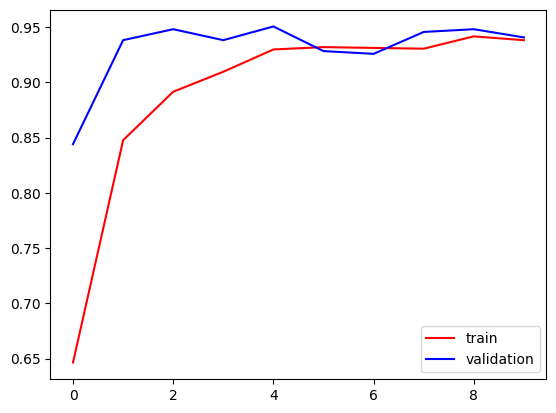

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

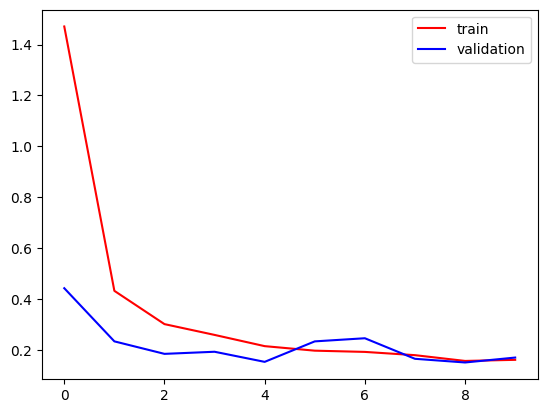

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

13/13 [==============================] - 8s 609ms/step - loss: 0.1694 - accuracy: 0.9406
Test Loss: 0.16937637329101562
Test Accuracy: 0.9405940771102905
